# Image Segmentation Using Color Spaces

It may be the era of deep learning and big data, where complex algorithms analyze images by being shown millions of them, but color spaces are still surprisingly useful for image analysis. Simple methods can still be powerful.

### What Are Color Spaces?

In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of three components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white.

RGB is considered an “additive” color space, and colors can be imagined as being produced from shining quantities of red, blue, and green light onto a black background.

Here are a few more examples of colors in RGB:

    Color 	RGB value

    Red 	255, 0, 0

    Orange 	255, 128, 0

    Pink 	255, 153, 255

### Segmentation Using Color Spaces

In [129]:
!pip3 install opencv-python

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [130]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [131]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [132]:
len(flags)

346

In [133]:
flags[40]

'COLOR_BAYER_GR2GRAY'

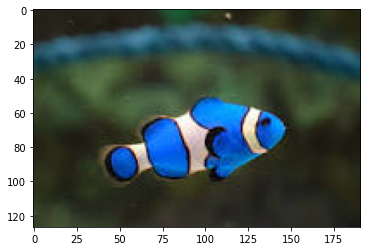

In [134]:
nemo = cv2.imread('download.jpeg')
plt.imshow(nemo)
plt.show()

In [135]:
nemo.reshape((128,128, 3))

ValueError: cannot reshape array of size 72771 into shape (128,128,3)

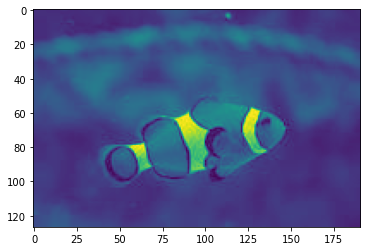

In [136]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2GRAY)
plt.imshow(nemo)
plt.show()

In [137]:
nemo.shape

(127, 191)

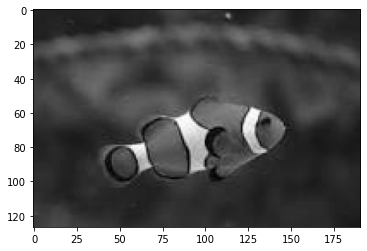

In [138]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_GRAY2RGB)
plt.imshow(nemo)
plt.show()

In [139]:
nemo.shape

(127, 191, 3)

In [140]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

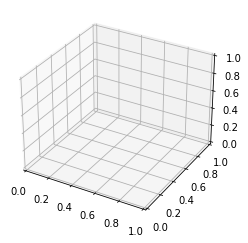

In [141]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [142]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [143]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [144]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

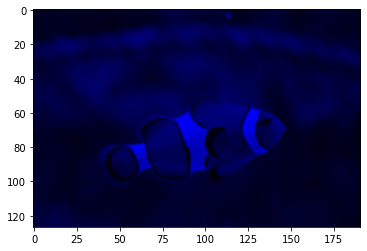

In [145]:
plt.imshow(hsv_nemo)
plt.show()

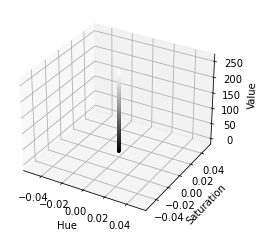

In [146]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [147]:
# picking color range
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)


In [148]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

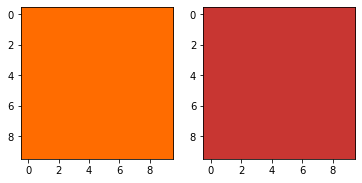

In [149]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [150]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

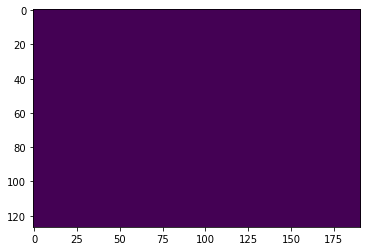

In [151]:
plt.imshow(mask)
plt.show()

In [152]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

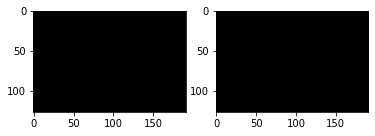

In [153]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [154]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

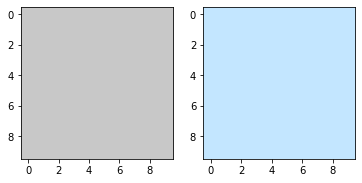

In [155]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

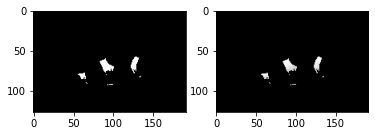

In [156]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

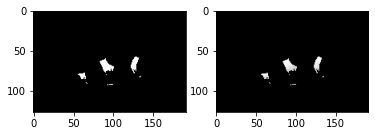

In [157]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

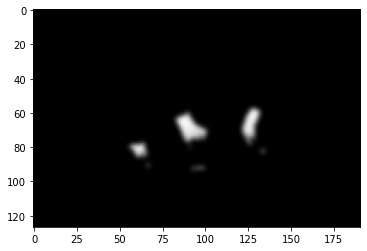

In [158]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()